In [3]:
# Data processing
import pandas as pd
import numpy as np
import scipy.stats

# Visualization
import seaborn as sb

# Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Other
import math
import random
import sklearn
from nltk.corpus import stopwords
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [4]:
ratings = pd.read_csv("../archive/rating_complete.csv")
ratings

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9
...,...,...,...
57633273,353404,502,8
57633274,353404,987,4
57633275,353404,225,8
57633276,353404,243,7


In [5]:
anime_df = pd.read_csv("../archive/anime.csv")
anime_df["anime_id"] = anime_df["MAL_ID"]
anime_df

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,anime_id
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0,1
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0,5
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0,6
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0,7
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17557,48481,Daomu Biji Zhi Qinling Shen Shu,Unknown,"Adventure, Mystery, Supernatural",Unknown,盗墓笔记之秦岭神树,ONA,Unknown,"Apr 4, 2021 to ?",Unknown,...,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48481
17558,48483,Mieruko-chan,Unknown,"Comedy, Horror, Supernatural",Unknown,見える子ちゃん,TV,Unknown,2021 to ?,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48483
17559,48488,Higurashi no Naku Koro ni Sotsu,Unknown,"Mystery, Dementia, Horror, Psychological, Supe...",Higurashi:When They Cry – SOTSU,ひぐらしのなく頃に卒,TV,Unknown,"Jul, 2021 to ?",Summer 2021,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48488
17560,48491,Yama no Susume: Next Summit,Unknown,"Adventure, Slice of Life, Comedy",Unknown,ヤマノススメ Next Summit,TV,Unknown,Unknown,Unknown,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,48491


In [6]:
df = pd.merge(ratings, anime_df[['anime_id','Name', 'Genres']], on="anime_id", how="inner")
df

,user_id,anime_id,rating,Name,Genres
0,0,430,9,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
1,6,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
2,18,430,10,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
3,19,430,8,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
4,33,430,4,Fullmetal Alchemist: The Conqueror of Shamballa,"Military, Comedy, Historical, Drama, Fantasy, ..."
...,...,...,...,...,...
57633273,315549,38853,1,Ex-Arm,"Action, Sci-Fi, Ecchi, Seinen"
57633274,350024,38853,10,Ex-Arm,"Action, Sci-Fi, Ecchi, Seinen"
57633275,311855,39435,6,Oshiri Tantei Movie 1: Curry Naru Jiken,"Mystery, Comedy, Kids, Fantasy"
57633276,334473,35746,4,6 Lovers,"Comedy, Drama, Romance, School, Shounen Ai, Sl..."


# Data Preparation
* 57,633,278 rows are to many entries to compute, let's reduce the dataset

In [7]:
# User ratings
print(df["user_id"].value_counts().mean())
df["user_id"].value_counts()

185.87842313882197


189037    15455
162615    14864
68042     13462
283786    12778
259790     9996
          ...  
136422        1
213994        1
196985        1
190834        1
206653        1
Name: user_id, Length: 310059, dtype: int64

In [8]:
# Anime ratings
print(df["anime_id"].value_counts().mean())
df["anime_id"].value_counts()

3415.912636320531


1535     182375
16498    169794
11757    161192
6547     141127
30276    138924
          ...  
39686         1
39685         1
35153         1
40594         1
39627         1
Name: anime_id, Length: 16872, dtype: int64

In [9]:
# We are left still with 38,616,425 entries even after filtering out users and animes
# so let's sample the remaining dataset so we get a smaller one

df_sample = df.sample(frac=0.05)
df_sample # 34622 entries seems more logical for first runs so we can re-run faster

,user_id,anime_id,rating,Name,Genres
34802791,111469,15699,6,Haiyore! Nyaruko-san W,"Sci-Fi, Comedy, Parody"
32876039,11946,3785,8,Evangelion: 3.0 You Can (Not) Redo,"Action, Sci-Fi, Psychological, Drama, Mecha"
40418486,288628,40839,8,"Kanojo, Okarishimasu","Comedy, Romance, School, Shounen"
34836738,229765,9289,7,Hanasaku Iroha,"Slice of Life, Comedy, Drama"
8669131,284491,8074,5,Highschool of the Dead,"Action, Horror, Supernatural, Ecchi, Shounen"
...,...,...,...,...,...
41742365,142656,997,7,Bishoujo Senshi Sailor Moon S: Kaguya-hime no ...,"Adventure, Comedy, Drama, Magic, Romance, Fant..."
2600833,140617,6547,9,Angel Beats!,"Action, Comedy, Drama, School, Supernatural"
26194915,62521,18857,7,Ore no Imouto ga Konnani Kawaii Wake ga Nai. S...,"Slice of Life, Comedy, Romance"
23451823,250341,908,7,Fullmetal Alchemist: Premium Collection,"Fantasy, Comedy, Shounen"


In [10]:
# df.info()
# User ratings
print("USERS \n")
print(df_sample["user_id"].value_counts().mean())
print(df_sample["user_id"].value_counts())
print("\n")

print("ANIMES \n")
# Anime ratings
print(df_sample["anime_id"].value_counts().mean())
print(df_sample["anime_id"].value_counts())

USERS 

10.693543419289957
189037    803
162615    784
68042     706
283786    612
259790    456
         ... 
71400       1
164149      1
18850       1
116952      1
151429      1
Name: user_id, Length: 269477, dtype: int64


ANIMES 

195.64559712132527
1535     9030
16498    8372
11757    7929
6547     7271
30276    7031
         ... 
8213        1
30125       1
35783       1
6900        1
16586       1
Name: anime_id, Length: 14729, dtype: int64


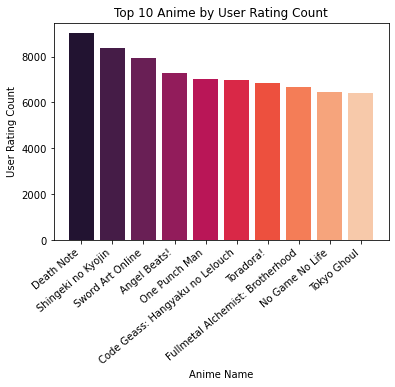

In [11]:
# Data Visualization
import matplotlib.pyplot as plt

# Count the number of occurrences of each anime name
top_10_anime = df_sample['Name'].value_counts().nlargest(10)
palette = sb.color_palette('rocket', len(top_10_anime))
# Create the bar chart
plt.bar(top_10_anime.index, top_10_anime.values, color=palette)

# Set the title and labels
plt.title('Top 10 Anime by User Rating Count')
plt.xlabel('Anime Name')
plt.ylabel('User Rating Count')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=40, ha="right")

# Show the plot
plt.show()

In [12]:
# Filter out users with less than 150 ratings and animes with less than 3500 ratings
df_sample_anime = df_sample.groupby("anime_id").filter(lambda x: len(x) > 100) # 16872
df_sample_anime

,user_id,anime_id,rating,Name,Genres
34802791,111469,15699,6,Haiyore! Nyaruko-san W,"Sci-Fi, Comedy, Parody"
32876039,11946,3785,8,Evangelion: 3.0 You Can (Not) Redo,"Action, Sci-Fi, Psychological, Drama, Mecha"
40418486,288628,40839,8,"Kanojo, Okarishimasu","Comedy, Romance, School, Shounen"
34836738,229765,9289,7,Hanasaku Iroha,"Slice of Life, Comedy, Drama"
8669131,284491,8074,5,Highschool of the Dead,"Action, Horror, Supernatural, Ecchi, Shounen"
...,...,...,...,...,...
41742365,142656,997,7,Bishoujo Senshi Sailor Moon S: Kaguya-hime no ...,"Adventure, Comedy, Drama, Magic, Romance, Fant..."
2600833,140617,6547,9,Angel Beats!,"Action, Comedy, Drama, School, Supernatural"
26194915,62521,18857,7,Ore no Imouto ga Konnani Kawaii Wake ga Nai. S...,"Slice of Life, Comedy, Romance"
23451823,250341,908,7,Fullmetal Alchemist: Premium Collection,"Fantasy, Comedy, Shounen"


In [13]:
df_sample_users = df_sample_anime.groupby("user_id").filter(lambda x: len(x) > 100) # 310059
df_sample_users

,user_id,anime_id,rating,Name,Genres
32288106,351361,27957,9,Steins;Gate: Soumei Eichi no Cognitive Computing,"Slice of Life, Comedy"
5405565,277841,11757,6,Sword Art Online,"Action, Game, Adventure, Romance, Fantasy"
27543639,148413,1530,10,Kanon (2006),"Slice of Life, Supernatural, Drama, Romance"
53695826,144837,33447,2,Piace: Watashi no Italian,"Slice of Life, Comedy"
40700184,122020,38101,7,5-toubun no Hanayome,"Harem, Comedy, Romance, School, Shounen"
...,...,...,...,...,...
52411176,328397,1374,2,Kyoushoku Soukou Guyver (2005),"Adventure, Sci-Fi, Shounen"
55522666,291207,910,4,Himawari!,"Adventure, Comedy, Martial Arts"
19505738,236207,656,7,Air in Summer,"Romance, Supernatural, Comedy, Historical, Drama"
38520237,290269,12403,8,Yuru Yuri♪♪,"Slice of Life, Comedy, School, Shoujo Ai"


In [14]:
# User ratings
print("USERS \n")
print(df_sample_users["user_id"].value_counts().mean())
print(df_sample_users["user_id"].value_counts().head())
print("\n")

print("ANIMES \n")
# Anime ratings
print(df_sample_users["anime_id"].value_counts().mean())
print(df_sample_users["anime_id"].value_counts().head())

USERS 

121.42391304347827
189037    203
162615    198
277841    192
68042     191
55748     190
Name: user_id, dtype: int64


ANIMES 

5.798598494679471
25835    19
28851    19
18095    17
11757    17
11433    16
Name: anime_id, dtype: int64


In [15]:
df_sample = df_sample_users

# Evaluation
Divide df into training and test set (80 - 20)

In [16]:
train_df, test_df = train_test_split(df_sample.drop(columns={"Name","Genres"}),
                                #    stratify=df_sample['user_id'], 
                                   test_size=0.20,
                                   random_state=42)

print('# ratings on Train set: %d' % len(train_df))
print('# ratings on Test set: %d' % len(test_df))
train_df

# ratings on Train set: 17873
# ratings on Test set: 4469


,user_id,anime_id,rating
41831111,312302,1487,9
16239063,87672,6205,2
22715212,308384,228,5
33599261,218449,1639,6
29970206,68042,210,8
...,...,...,...
32052863,168939,10156,8
50748674,79213,36431,7
31665169,121822,22687,1
18607155,297816,6045,10


In Recommender Systems, there are a set metrics commonly used for evaluation. We chose to work with Top-N accuracy metrics, which evaluates the accuracy of the top recommendations provided to a user, comparing to the items the user has actually interacted in test set.
This evaluation method works as follows:

* For each user
    * For each item the user has interacted in test set
        * Sample 100 other items the user has never interacted.
            
            Ps: Here we naively assume those non interacted items are not relevant to the user, which might not be true, as the user may simply not be aware of those not interacted items. But let's keep this assumption.
        * Ask the recommender model to produce a ranked list of recommended items, from a set composed one interacted item and the 100 non-interacted ("non-relevant!) items
        * Compute the Top-N accuracy metrics for this user and interacted item from the recommendations ranked list
* Aggregate the global Top-N accuracy metrics

In [17]:
#Indexing by personId to speed up the searches during evaluation
indexed_df = df_sample.set_index('user_id')
train_indexed_df = train_df.set_index('user_id')
test_indexed_df = test_df.set_index('user_id')

In [18]:
def get_items_interacted(person_id, interactions_df):
    # Get the user's data and merge in the movie information.

    if person_id in interactions_df.index :
        interacted_items = interactions_df.loc[person_id]['anime_id']
    else:
        return []
    
    # print(interacted_items.head(1))
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [19]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:


    def get_not_interacted_items_sample(self, person_id, sample_size, seed=42):
        interacted_items = get_items_interacted(person_id, indexed_df.drop(columns={"Name","Genres"}))
        all_items = set(indexed_df['anime_id'])
        non_interacted_items = all_items - interacted_items
        
        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    def evaluate_model_for_user(self, model, person_id):
        #Getting the items in test set
        interacted_values_testset = test_indexed_df.loc[person_id]
        if type(interacted_values_testset['anime_id']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['anime_id'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['anime_id'])])  
        interacted_items_count_testset = len(person_interacted_items_testset) 

        #Getting a ranked recommendation list from a model for a given user
        person_recs_df = model.recommend_items(person_id, 
                                               items_to_ignore=get_items_interacted(person_id, 
                                                                                    train_indexed_df), 
                                               topn=10000000000)
        hits_at_5_count = 0
        hits_at_10_count = 0

        #For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            #Getting a random sample (100) items the user has not interacted 
            #(to represent items that are assumed to be no relevant to the user)
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, 
                                                                          sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, 
                                                                          seed=item_id%(2**32))
            #Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            #Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['anime_id'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['anime_id'].values
            #Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        #Recall is the rate of the interacted items that are ranked among the Top-N recommended items, 
        #when mixed with a set of non-relevant items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        # ADEDEDEDEDD
        # print(person_metrics)
        return person_metrics

    def evaluate_model(self, model):
        #print('Running evaluation for users')
        people_metrics = []
        for idx, person_id in enumerate(list(test_indexed_df.index.unique().values)):
            if idx % 100 == 0 and idx > 0:
               print('%d users processed' % idx)
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['user_id'] = person_id
            people_metrics.append(person_metrics)
            # if(idx > 15):
            #     break
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics) \
                            .sort_values('interacted_count', ascending=False)
            
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()    

## Popularity model

In [20]:
#Computes the most popular items
item_popularity_df = indexed_df.groupby('anime_id')['rating'].sum().sort_values(ascending=False).reset_index()
item_popularity_df.head(10)

,anime_id,rating
0,28851,160
1,25835,139
2,9253,134
3,15689,132
4,2001,130
5,11757,128
6,1575,127
7,23283,125
8,14353,121
9,23289,119


In [21]:
class PopularityRecommender:
    
    MODEL_NAME = 'Popularity'
    
    def __init__(self, popularity_df, items_df=None):
        self.popularity_df = popularity_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Recommend the more popular items that the user hasn't seen yet.
        recommendations_df = self.popularity_df[~self.popularity_df['anime_id'].isin(items_to_ignore)] \
                               .sort_values('rating', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')
    
            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'anime_id', 
                                                          right_on = 'anime_id')[['rating']]


        return recommendations_df
    
popularity_model = PopularityRecommender(item_popularity_df, indexed_df)

In [22]:
# RUN POPULARITY MODEL

# import warnings
# warnings.filterwarnings('ignore')
# print('Evaluating Popularity recommendation model... (', len(test_indexed_df.value_counts()), ' users )')
# pop_global_metrics, pop_detailed_results_df = model_evaluator.evaluate_model(popularity_model)
# print('\nGlobal metrics:\n%s' % pop_global_metrics)
# pop_detailed_results_df.head(10)

## Collaborative Filtering
* For matrix factorization we use Singular Value Decomposition (SVD)
* Cosine similarity between users
* 

### Singular Value Decmposition Matrix Factorization


In [23]:
# User-item matrix (users as rows, anime as columns)
# print(train_df)
user_anime_df = train_df.pivot(index='user_id', columns='anime_id', values='rating').fillna(0)
user_anime_df.head()

anime_id,1,5,6,7,15,16,17,18,19,20,...,41380,41389,41433,41468,41619,41783,41930,42091,42603,42984
user_id,,,,,,,,,,,,,,,,,,,,,
1469,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0
5648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7179,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0
9528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
user_anime_matrix = user_anime_df.values
user_anime_matrix[:10]

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ...,
       [10.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [25]:
users_ids = list(user_anime_df.index)
users_ids[:10]

[1469, 4773, 5648, 7179, 9528, 10255, 10367, 11249, 11697, 12888]

In [26]:
user_anime_matrix_sparse = csr_matrix(user_anime_matrix)
user_anime_matrix_sparse

<184x3793 sparse matrix of type '<class 'numpy.float64'>'
	with 17873 stored elements in Compressed Sparse Row format>

In [27]:
#The number of factors to factor the user-anime matrix.
NUMBER_OF_FACTORS_MF = 15
#Performs matrix factorization of the original user anime matrix
U, sigma, Vt = svds(user_anime_matrix_sparse, k = NUMBER_OF_FACTORS_MF)
sigma = np.diag(sigma)
user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

print("U shape - ",U.shape, "\n Vt shape - ", Vt.shape, "\nsigma shape - ", sigma.shape, "\n", user_predicted_ratings)


U shape -  (184, 15) 
 Vt shape -  (15, 3793) 
sigma shape -  (15, 15) 
 [[ 1.05582012e-01  3.20350036e-01  1.48895862e-01 ...  7.15591936e-02
   2.06964169e-02  1.18957932e-01]
 [ 5.91328051e-01  5.14915136e-01  3.14558538e-01 ...  2.14747772e-01
   1.12486917e-01  3.97571003e-01]
 [ 3.58699573e-01  5.75865990e-01  3.86044206e-01 ...  1.27210624e-01
   2.72211938e-02  2.13203584e-01]
 ...
 [ 1.39446725e-01  3.70911139e-01  2.15622906e-01 ...  4.89329182e-02
  -2.99021840e-04  3.23390888e-02]
 [ 1.90293245e-01  5.49159712e-01  1.66474507e-01 ...  1.44393767e-01
   9.17790239e-02  4.26647609e-02]
 [ 9.61437333e-02  4.43286009e-01  3.68443541e-01 ...  6.96855183e-02
  -2.59839876e-02  1.15775774e-01]]


In [28]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(user_predicted_ratings, columns = user_anime_df.columns, index=users_ids).transpose()
print(len(cf_preds_df.columns))
cf_preds_df.head(10)

184


,1469,4773,5648,7179,9528,10255,10367,11249,11697,12888,...,336602,336750,337955,340073,344776,345119,345498,346353,348776,351361
anime_id,,,,,,,,,,,,,,,,,,,,,
1,0.105582,0.591328,0.358700,0.265492,0.537970,0.259628,0.092558,0.315448,0.222011,0.457096,...,0.206672,0.276348,0.141751,0.515739,0.210125,0.441402,0.297668,0.139447,0.190293,0.096144
5,0.320350,0.514915,0.575866,0.356471,0.102437,0.363995,0.079980,0.327043,0.363260,0.097912,...,0.236362,0.212184,0.288680,0.335073,0.263829,0.214875,0.401377,0.370911,0.549160,0.443286
6,0.148896,0.314559,0.386044,0.218034,0.128105,0.153589,0.066518,0.223588,0.100962,0.067925,...,0.153777,0.190533,0.092843,0.172404,0.226393,0.134036,0.265035,0.215623,0.166475,0.368444
7,0.118051,-0.317477,0.012099,0.189894,0.394519,0.528820,0.130069,0.081195,0.370943,0.325395,...,-0.002682,0.156432,0.409893,0.031921,0.326673,0.109578,0.195610,0.178352,0.652797,0.252264
15,0.250370,0.438888,-0.651399,0.032446,-0.043518,-0.023426,0.299664,0.131900,0.188679,0.923756,...,-0.010807,0.475245,-0.287759,-0.270747,0.234484,-0.254430,-0.382452,0.492094,0.193807,0.517400
16,0.154159,0.385401,0.281963,0.287503,0.238049,0.675982,0.050608,0.114827,0.430418,0.271107,...,0.153930,0.050951,0.341380,0.324536,0.261270,0.321704,0.274523,0.138301,0.577106,-0.061769
17,0.104773,0.681473,0.392397,0.149769,0.147589,-0.114007,0.139161,0.420263,0.072637,0.098731,...,0.168919,0.161644,-0.311807,0.170489,0.319966,0.034389,0.309165,-0.071834,0.043547,0.191290
18,-0.026482,-0.508080,0.359645,0.301996,0.133358,0.639196,0.032548,0.074116,0.391227,-0.152355,...,0.103102,-0.084098,0.780418,0.348936,0.250531,0.369513,0.435414,0.221093,0.835772,-0.079462
19,0.301073,0.053938,0.766986,0.143288,0.343351,-0.128365,0.175030,0.274790,0.019855,0.134740,...,0.163730,0.412292,0.409565,-0.174278,0.275271,-0.318668,0.084305,0.813266,0.223461,0.821459


In [29]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df, items_df=None):
        self.cf_predictions_df = cf_predictions_df
        self.items_df = items_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10, verbose=False):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False) \
                                    .reset_index().rename(columns={user_id: 'rating'})

        # Recommend the highest predicted rating movies that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['anime_id'].isin(items_to_ignore)] \
                               .sort_values('rating', ascending = False) \
                               .head(topn)

        if verbose:
            if self.items_df is None:
                raise Exception('"items_df" is required in verbose mode')

            recommendations_df = recommendations_df.merge(self.items_df, how = 'left', 
                                                          left_on = 'anime_id', 
                                                          right_on = 'anime_id')[['rating', 'anime_id']]


        return recommendations_df
    
cf_recommender_model = CFRecommender(cf_preds_df, indexed_df)

In [30]:
import warnings
warnings.filterwarnings('ignore')
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
100 users processed
183 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.05571716267621392, 'recall@10': 0.10763034235846945}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
33,1,3,52,0.019231,0.057692,162615
81,2,2,47,0.042553,0.042553,23930
39,1,1,47,0.021277,0.021277,68042
13,3,7,42,0.071429,0.166667,297524
41,1,5,42,0.023810,0.119048,277841
5,1,2,42,0.023810,0.047619,189037
99,1,4,36,0.027778,0.111111,291207
46,2,2,35,0.057143,0.057143,64807
128,1,4,35,0.028571,0.114286,181711
86,0,3,34,0.000000,0.088235,283786


### User-based collaborative filtering
* Pearson correlation between users

In [31]:
# Making anime-user matrix with predicted user ratings
user_anime_df
# Compute the Pearson correlation between users
user_item_matrix = user_anime_df.subtract(user_anime_df.mean(axis=1), axis='rows')
user_item_matrix
# user_corr = user_item_matrix.T.corr()

anime_id,1,5,6,7,15,16,17,18,19,20,...,41380,41389,41433,41468,41619,41783,41930,42091,42603,42984
user_id,,,,,,,,,,,,,,,,,,,,,
1469,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,...,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531,-0.145531
4773,-0.231215,-0.231215,-0.231215,-0.231215,-0.231215,-0.231215,-0.231215,-0.231215,-0.231215,-0.231215,...,-0.231215,-0.231215,-0.231215,6.768785,-0.231215,-0.231215,-0.231215,-0.231215,-0.231215,-0.231215
5648,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,...,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587,-0.204587
7179,-0.164777,-0.164777,-0.164777,-0.164777,-0.164777,-0.164777,-0.164777,-0.164777,-0.164777,-0.164777,...,-0.164777,-0.164777,-0.164777,-0.164777,-0.164777,-0.164777,-0.164777,4.835223,-0.164777,-0.164777
9528,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,...,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351,-0.190351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345119,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,...,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423,-0.172423
345498,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,...,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550,-0.184550
346353,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,...,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305,-0.165305


In [32]:
# User correlation
user_corr = user_item_matrix.T.corr()
user_corr

user_id,1469,4773,5648,7179,9528,10255,10367,11249,11697,12888,...,336602,336750,337955,340073,344776,345119,345498,346353,348776,351361
user_id,,,,,,,,,,,,,,,,,,,,,
1469,1.000000,0.000303,0.012236,-0.006387,-0.022349,0.016669,-0.006246,-0.015676,0.025924,0.001329,...,0.019989,0.004956,-0.022663,-0.003260,0.026589,-0.007527,-0.005287,-0.000061,0.021812,0.035700
4773,0.000303,1.000000,-0.005934,0.016954,-0.002744,0.026133,0.009049,0.035306,0.019135,0.010720,...,0.029242,0.011706,0.004319,-0.021936,-0.012275,0.000328,0.016621,-0.010910,-0.009170,-0.009257
5648,0.012236,-0.005934,1.000000,-0.026551,0.012970,-0.011536,0.003810,-0.013156,-0.012236,-0.002763,...,0.015163,-0.009330,0.023585,0.008914,0.046581,0.004927,0.001931,0.024965,-0.019321,-0.003200
7179,-0.006387,0.016954,-0.026551,1.000000,0.001372,0.006415,0.006035,0.025218,0.004084,-0.005376,...,0.058292,-0.002180,0.022023,-0.009148,0.057167,-0.007922,0.056163,-0.007099,-0.011150,-0.008306
9528,-0.022349,-0.002744,0.012970,0.001372,1.000000,-0.001121,-0.012405,-0.009444,0.006868,0.049293,...,-0.008163,0.020336,0.035299,0.003197,0.003600,-0.022001,-0.003568,-0.021587,0.000584,-0.013414
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345119,-0.007527,0.000328,0.004927,-0.007922,-0.022001,-0.001424,-0.006930,0.003964,-0.007993,-0.021636,...,-0.012067,0.038860,-0.010698,0.029105,-0.007457,1.000000,-0.006460,0.007779,0.011307,-0.001008
345498,-0.005287,0.016621,0.001931,0.056163,-0.003568,-0.000050,0.015128,-0.019493,0.002632,-0.009369,...,0.004331,0.026644,-0.019832,0.011768,0.000530,-0.006460,1.000000,-0.012000,-0.014553,-0.020221
346353,-0.000061,-0.010910,0.024965,-0.007099,-0.021587,0.007760,0.010875,0.046839,-0.004959,0.017602,...,-0.000368,0.005533,-0.021890,0.008608,0.016324,0.007779,-0.012000,1.000000,-0.009288,0.023114


In [33]:
# Sort the correlations in descending order and select the top n similar users
# similar_users = user_corr[251].sort_values(ascending=False)[1:10+1]
# similar_users

In [34]:
# Fill with -1 so unpredicted movies arent altered

user_pred_ratings = user_item_matrix.copy()
for col in user_pred_ratings.columns:
    user_pred_ratings[col].values[:] = -1
user_pred_ratings

anime_id,1,5,6,7,15,16,17,18,19,20,...,41380,41389,41433,41468,41619,41783,41930,42091,42603,42984
user_id,,,,,,,,,,,,,,,,,,,,,
1469,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4773,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
5648,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
7179,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
9528,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345119,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
345498,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
346353,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [35]:
# Get IDs of anime user '240' didn't watch
# Didn't watch
# user_anime_df.transpose()[user_anime_df.transpose()[240] == 0].index.tolist()
# # Watched
# user_anime_df.transpose()[user_anime_df.transpose()[240] != 0].index.tolist()

In [36]:
from IPython.display import clear_output, display
# make prediction dataframe 
user_corr.index.tolist()[:5]
progress = 0

# for each user
for user_id in user_corr.index.tolist():
    # top 10 similar users
    similar_users = user_corr[user_id].sort_values(ascending=False)[1:10+1].index.tolist()
    # for each anime user didn't watch
    for anime_id in user_anime_df.transpose()[user_anime_df.transpose()[user_id] == 0].index.tolist():
        total = 0
        count = 0
        # If user didn't rate that anime we don't him to predict the rating based on his value
        for user in similar_users:
            if( user_anime_df[anime_id][user] != 0):
                total += user_item_matrix[anime_id][user] * user_corr[user][user_id]
                count +=1
        if(count != 0):
            user_pred_ratings[anime_id][user_id] = total/count
    progress += 1
    clear_output(wait=True)
    print(progress, "/", len(user_corr.index.tolist()))

            

user_pred_ratings

184 / 184


anime_id,1,5,6,7,15,16,17,18,19,20,...,41380,41389,41433,41468,41619,41783,41930,42091,42603,42984
user_id,,,,,,,,,,,,,,,,,,,,,
1469,-1.000000,0.399496,-1.0,-1.000000,-1.000000,-1.000000,0.280707,-1.000000,0.440565,-1.000000,...,-1.0,-1.00000,-1.000000,-1.0,0.340934,-1.0,-1.000000,-1.000000,-1.0,0.411608
4773,0.347084,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.00000,0.133646,-1.0,0.292220,-1.0,0.113361,-1.000000,-1.0,-1.000000
5648,-1.000000,-1.000000,-1.0,0.346035,-1.000000,0.301621,0.253480,-1.000000,-1.000000,-1.000000,...,-1.0,-1.00000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,0.218578,-1.0,-1.000000
7179,-1.000000,0.294438,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,0.334568,0.243105,-1.000000,...,-1.0,-1.00000,0.292315,-1.0,0.242881,-1.0,0.225975,-1.000000,-1.0,-1.000000
9528,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.0,-1.00000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345119,0.203425,-1.000000,-1.0,0.185369,-1.000000,-1.000000,0.203425,0.289663,-1.000000,-1.000000,...,-1.0,0.12372,0.155533,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000
345498,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.169903,0.262544,...,-1.0,-1.00000,0.273946,-1.0,-1.000000,-1.0,-1.000000,0.271560,-1.0,-1.000000
346353,0.460459,-1.000000,-1.0,-1.000000,0.328982,-1.000000,-1.000000,0.242178,0.369715,-1.000000,...,-1.0,-1.00000,-1.000000,-1.0,-1.000000,-1.0,-1.000000,-1.000000,-1.0,-1.000000


In [37]:
# compare cf_preds_df with user_pred_ratings
# print(cf_preds_df[240].value_counts())
# print(user_pred_ratings.transpose()[240].value_counts())

In [38]:
# Using pearson correlation to have similarity between users, and than using that similarity as weight
# predict user rating on anime based on similar users rating

import warnings
warnings.filterwarnings('ignore')
cf_recommender_model = CFRecommender(user_pred_ratings.transpose(), indexed_df)
print('Evaluating Collaborative Filtering User Pearson correlation model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)
print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
100 users processed
183 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.061087491608861046, 'recall@10': 0.11434325352427836}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,user_id
33,1,2,52,0.019231,0.038462,162615
81,4,6,47,0.085106,0.127660,23930
39,2,3,47,0.042553,0.063830,68042
13,1,3,42,0.023810,0.071429,297524
41,3,6,42,0.071429,0.142857,277841
5,0,2,42,0.000000,0.047619,189037
99,2,3,36,0.055556,0.083333,291207
46,2,4,35,0.057143,0.114286,64807
128,2,2,35,0.057143,0.057143,181711
86,1,3,34,0.029412,0.088235,283786


### Not rating based recommendation

In [39]:
# Recomendation using Knn to find closest neighboors of an anime
from sklearn.neighbors import NearestNeighbors

anime_matrix = csr_matrix(user_anime_df.transpose())

model_knn = NearestNeighbors(metric='cosine', algorithm='brute')

model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [82]:
def recomend_anime_based(animeName = np.random.choice(user_anime_df.transpose().index), anime_df=user_anime_df.transpose()):

    index = anime_df.index.get_loc(animeName)
    distances, indices = model_knn.kneighbors(anime_df.iloc[index, :].values.reshape(1, -1), n_neighbors=10)

    print("Animes similar to -", df_sample[df_sample['anime_id'] == anime_df.index[index] ]['Name'].values[0], "- are :")
    for i, (dist, ind) in enumerate(zip(distances.flatten()[1:], indices.flatten()[1:])):
        print(f"{df_sample[df_sample['anime_id'] == anime_df.index[ind]]['Name'].values[0]} ---> {dist}")

In [83]:
recomend_anime_based()
# df_sample[df_sample['anime_id'] == anime_df.index[ind]]['Name'].values[0]

Animes similar to - Piano no Mori - are :
Zoids Shinseiki/Zero ---> 0.44457430840632317
One Piece Film: Gold ---> 0.5448075053340542
Kore ga Watashi no Goshujinsama ---> 0.5531456947185482
ChäoS;Child Episode 0 ---> 0.5623742436425688
Guin Saga ---> 0.5707500604877154
Hikaru no Go: Hokuto Hai e no Michi ---> 0.5818214405105513
Pokemon Movie 10: Dialga vs. Palkia vs. Darkrai ---> 0.5839748528310782
Imanara Maniau! Log Horizon ---> 0.5839748528310782
Gintama: Shinyaku Benizakura-hen ---> 0.6104218210018632


## Content Based Filtering

In [107]:
df_content = anime_df[["Name","anime_id", "Genres", "Score"]]
df_content["anime_id"] = df_content["anime_id"].index
df_content

,Name,anime_id,Genres,Score
0,Cowboy Bebop,0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",8.78
1,Cowboy Bebop: Tengoku no Tobira,1,"Action, Drama, Mystery, Sci-Fi, Space",8.39
2,Trigun,2,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",8.24
3,Witch Hunter Robin,3,"Action, Mystery, Police, Supernatural, Drama, ...",7.27
4,Bouken Ou Beet,4,"Adventure, Fantasy, Shounen, Supernatural",6.98
...,...,...,...,...
17557,Daomu Biji Zhi Qinling Shen Shu,17557,"Adventure, Mystery, Supernatural",Unknown
17558,Mieruko-chan,17558,"Comedy, Horror, Supernatural",Unknown
17559,Higurashi no Naku Koro ni Sotsu,17559,"Mystery, Dementia, Horror, Psychological, Supe...",Unknown
17560,Yama no Susume: Next Summit,17560,"Adventure, Slice of Life, Comedy",Unknown


In [109]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TfidfVectorizer with various parameters
tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Fill NaN values in the 'Genres' column with an empty string
df_content['Genres'] = df_content['Genres'].fillna('')

# Split the 'Genres' column by comma and convert to string format
genres_str = df_content['Genres'].str.split(',').astype(str)

# Use the TfidfVectorizer to transform the genres_str into a sparse matrix
tfv_matrix = tfv.fit_transform(genres_str)

# Print the shape of the sparse matrix
print(tfv_matrix.shape)

(17562, 2283)


In [110]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [111]:
# Create a Pandas Series object where the index is the anime names and the values are the indices in anime_data
indices = pd.Series(df_content.index, index=df_content['Name'])

# Remove duplicates in the index (i.e., duplicate anime names)
# indices = indices.drop_duplicates()
print(indices)

Name
Cowboy Bebop                           0
Cowboy Bebop: Tengoku no Tobira        1
Trigun                                 2
Witch Hunter Robin                     3
Bouken Ou Beet                         4
                                   ...  
Daomu Biji Zhi Qinling Shen Shu    17557
Mieruko-chan                       17558
Higurashi no Naku Koro ni Sotsu    17559
Yama no Susume: Next Summit        17560
Scarlet Nexus                      17561
Length: 17562, dtype: int64


In [119]:
def give_rec_cbf(title, sig=sig):
    # Get the index corresponding to anime title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the anime based on similarity scores
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Get the indices of top 10 most similar anime excluding the input anime
    anime_indices = [i[0] for i in sig_scores[1:11]]

    # Create dataframe of top 10 recommended anime
    top_anime = pd.DataFrame({
        'Anime name': df_sample['Name'].iloc[anime_indices].values,
        'Rating': df_sample['rating'].iloc[anime_indices].values
    })

    return top_anime

In [122]:
give_rec_cbf('One Piece')

,Anime name,Rating
0,Saint☆Oniisan (Movie),9
1,Planet With,2
2,Mardock Scramble: The Third Exhaust,7
3,Allison to Lillia,6
4,Boku wa Tomodachi ga Sukunai: Relay Shousetsu ...,5
5,Kimi ni Todoke 2nd Season,9
6,Sakura-sou no Pet na Kanojo,8
7,Aria the Animation,8
8,Computer Kakumei: Saikyou x Saisoku no Zunou T...,7
9,Kengan Ashura 2nd Season,7
